In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

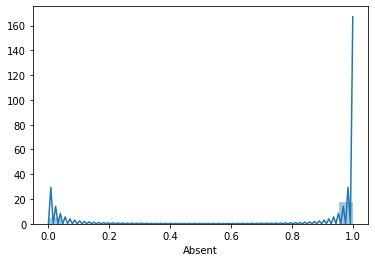

In [4]:
Absents = pd.read_csv("train_data.csv")
X_test  = pd.read_csv("test_data.csv")
Y_test  = pd.read_csv("sample_submission.csv")
sns.distplot(Absents['Absent'])

## Exploração  e visulaização do dataset

In [ ]:
Absents.dtypes

In [ ]:
len(Absents)

In [ ]:
Absents[Absents.columns[:10]]

In [ ]:
Absents[Absents.columns[10:]].head(2)

In [ ]:
Absents[Absents.columns[:10]].describe()

In [ ]:
Absents[Absents.columns[10:]].describe()

In [ ]:
sns.pairplot(Absents[['Age','Service time']])

In [ ]:
sns.pairplot(Absents[['Height','Weight','Body mass index']])

In [ ]:
sns.regplot(Absents["Hit target"],Absents["Education"])

In [ ]:
sns.distplot(Absents['Absent'])

In [ ]:
sns.distplot(Absents['Service time'])

In [ ]:
sns.jointplot(Absents['Hit target'],Absents['Disciplinary failure'])

In [ ]:
sns.pairplot(Absents,x_vars = ['Reason for absence', 
                                    'Month of absence' 
                                      ] ,y_vars = ['Absent'])
Absents.corr()


In [ ]:
sns.pairplot(Absents,x_vars = ['Day of the week', 
                                      'Seasons', 'Transportation expense', 'Distance from Residence to Work', 
                                      ] ,y_vars = ['Absent'])

In [ ]:
sns.pairplot(Absents,x_vars = ['Service time', 'Age',  'Hit target', 
                                      'Disciplinary failure'
                                      ] ,y_vars = ['Absent'])

In [ ]:
sns.pairplot(Absents,x_vars = ['Pet', 'Weight', 'Height', 'Body mass index'
                                      ] ,y_vars = ['Absent'])

In [ ]:
sns.pairplot(Absents,x_vars = ['Education', 'Son', 'Social drinker', 'Social smoker'
                                      ] ,y_vars = ['Absent'])

In [ ]:
Absents

## Pre tratemento de dados

In [46]:
abs = [x for x in Absents['Absent'] if x == 1]
workload = [int(x.replace(",","")) for x in Absents['Work load Average/day ']]
Absents['Work load Average/day '] = workload

Absents = Absents.drop(columns = 'ID')
X_test  = X_test.drop(columns  = 'ID')

AbsentsY = Absents['Absent'] 
AbsentsX = Absents.drop(columns = 'Absent')
AbsentsX

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,28,9,3,1,246,25,16,41,261756,87,0,1,0,1,0,0,67,170,23
496,28,9,3,1,246,25,16,41,261756,87,0,1,0,1,0,0,67,170,23
497,28,9,3,1,118,10,10,37,261756,87,0,1,0,0,0,0,83,172,28
498,23,9,3,1,155,12,14,34,261756,87,0,1,2,1,0,0,95,196,25


## Normalizar os dados

In [47]:
from sklearn import preprocessing

def normalize_dataset():
    global AbsentsX,X_testas
    x  = AbsentsX.values 
    x2 = X_test.values
    min_max_scaler = preprocessing.MinMaxScaler()
    scaler    = min_max_scaler.fit(x)
    x_scaled  = scaler.transform(x)
    x2_scaled = scaler.transform(x2)
    df  = pd.DataFrame(x_scaled)
    df2 = pd.DataFrame(x2_scaled)

    i = 0
    for x in AbsentsX:
        AbsentsX[x] = df[i]
        X_test [x] = df2[i]
        i+=1


        
def standardize_dataset():
    global AbsentsX,X_test
    x  =  AbsentsX.values
    x2 = X_test.values
    standart_scaler = preprocessing.StandardScaler()
    scaler = standart_scaler.fit(x)
    x_scaled  = scaler.transform(x)
    x2_scaled = scaler.transform(x2) 
    df  = pd.DataFrame(x_scaled)
    df2 = pd.DataFrame(x2_scaled)

    i = 0
    for x in AbsentsX:
        AbsentsX[x] = df[i]
        X_test[x]  = df2[i]
        i+=1
        
def binarize_dataset():
    global AbsentsX,X_test
    x  =  AbsentsX.values
    x2 = X_test.values
    Binarizer = preprocessing.Binarizer()
    binarizer = Binarizer.fit(x)
    x_scaled  = binarizer.transform(x)
    x2_scaled = binarizer.transform(x2) 
    df  = pd.DataFrame(x_scaled)
    df2 = pd.DataFrame(x2_scaled)

    i = 0
    for x in AbsentsX:
        AbsentsX[x] = df[i]
        X_test[x]  = df2[i]
        i+=1


##binarize_dataset()
normalize_dataset()
##standardize_dataset()
AbsentsX

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0.928571,0.545455,0.25,0.0,0.633333,0.659574,0.384615,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.2,0.653846,0.272727,0.578947
1,0.000000,0.545455,0.25,0.0,0.000000,0.170213,0.576923,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.0,0.807692,0.454545,0.631579
2,0.821429,0.545455,0.50,0.0,0.225926,0.978723,0.576923,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.0,0.634615,0.212121,0.631579
3,0.250000,0.545455,0.75,0.0,0.596296,0.000000,0.423077,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.0,0.230769,0.151515,0.263158
4,0.821429,0.545455,0.75,0.0,0.633333,0.659574,0.384615,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.2,0.653846,0.272727,0.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.000000,0.727273,0.25,0.0,0.474074,0.425532,0.500000,0.451613,0.322830,0.315789,0.0,0.0,0.00,1.0,0.0,0.0,0.211538,0.212121,0.210526
496,1.000000,0.727273,0.25,0.0,0.474074,0.425532,0.500000,0.451613,0.322830,0.315789,0.0,0.0,0.00,1.0,0.0,0.0,0.211538,0.212121,0.210526
497,1.000000,0.727273,0.25,0.0,0.000000,0.106383,0.269231,0.322581,0.322830,0.315789,0.0,0.0,0.00,0.0,0.0,0.0,0.519231,0.272727,0.473684
498,0.821429,0.727273,0.25,0.0,0.137037,0.148936,0.423077,0.225806,0.322830,0.315789,0.0,0.0,0.50,1.0,0.0,0.0,0.750000,1.000000,0.315789


In [25]:
AbsentsX[AbsentsX.columns[:10]].head(2)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target
0,1,1,1,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1,1,1,1


In [26]:
AbsentsX[AbsentsX.columns[10:]].head(2)

,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0,1,1,1,0,1,1,1,1
1,1,1,1,1,0,0,1,1,1


In [ ]:
X_test

## reinserir a coluna absent

In [5]:
AbsentsX.insert(len(AbsentsX.columns),'Absent',AbsentsY)

NameError: name 'AbsentsX' is not defined

## Balancear o dataset

In [49]:
def balance_dataset(nr_0,nr_1):
    global AbsentsX
    abs_shuffled = AbsentsX.sample(frac=1,random_state=4)
    A0 = abs_shuffled.loc[abs_shuffled['Absent'] == 1].sample(n=nr_0,random_state=4)
    A1 = abs_shuffled.loc[abs_shuffled['Absent'] == 0].sample(n=nr_1,random_state=4)
    
    balanced_absents = pd.concat([A0,A1])
    AbsentsX = balanced_absents.sample(frac=1,random_state=4)
        
    


A0 = len(AbsentsX[AbsentsX['Absent'] == 0])
A1 = len(AbsentsX[AbsentsX['Absent'] == 1])

nr_elements_dataset = A0

if A1 < A0:
    nr_elements_dataset = A1

print(nr_elements_dataset)
balance_dataset(nr_elements_dataset,nr_elements_dataset)
##balance_dataset(125,nr_elements_dataset)

print(len(AbsentsX))

105
210


## Removemos os outliers

### depois de balancear os dados

In [ ]:
for x in AbsentsX:
    print(x)

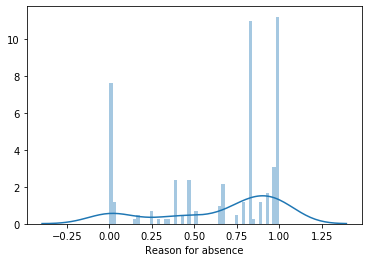

In [50]:
sns.distplot(AbsentsX['Reason for absence'],bins=50)

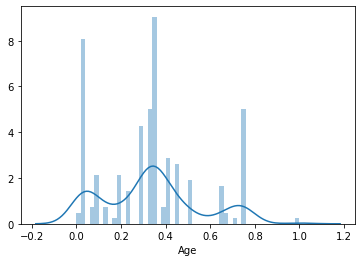

In [51]:
sns.distplot(AbsentsX["Age"],bins=50)

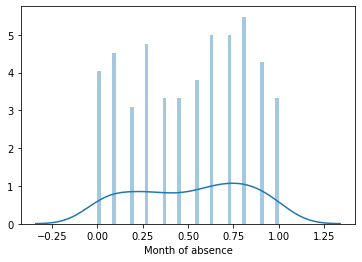

In [52]:
sns.distplot(AbsentsX["Month of absence"],bins=50)

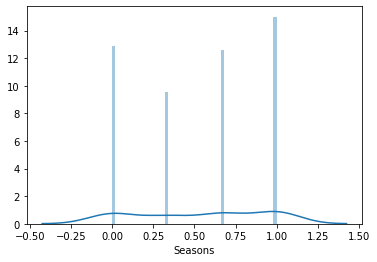

In [53]:
sns.distplot(AbsentsX["Seasons"],bins=50)

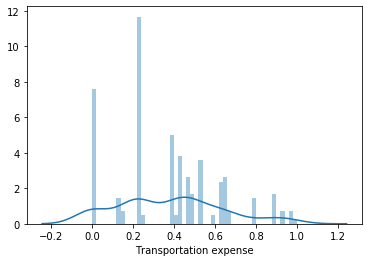

In [54]:
sns.distplot(AbsentsX["Transportation expense"],bins=50)

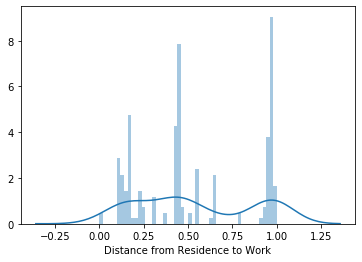

In [55]:
sns.distplot(AbsentsX["Distance from Residence to Work"],bins=50)

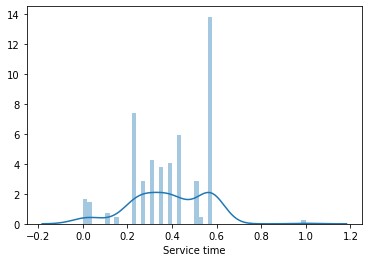

In [56]:
sns.distplot(AbsentsX["Service time"],bins=50)

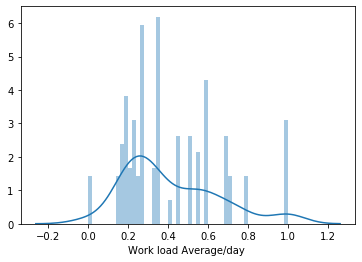

In [57]:
sns.distplot(AbsentsX["Work load Average/day "],bins=50)

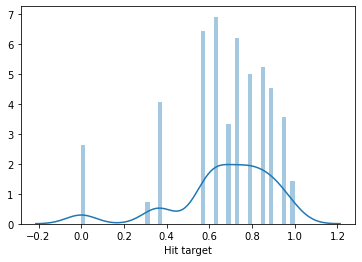

In [58]:
sns.distplot(AbsentsX["Hit target"],bins=50)

In [ ]:
sns.distplot(AbsentsX["Disciplinary failure"],bins=50)

In [ ]:
sns.distplot(AbsentsX["Education"],bins=50)

In [ ]:
sns.distplot(AbsentsX["Son"],bins=50)

In [ ]:
sns.distplot(AbsentsX["Social drinker"],bins=50)

In [ ]:
sns.distplot(AbsentsX["Social smoker"],bins=50)

In [ ]:
sns.distplot(AbsentsX["Pet"],bins=50)

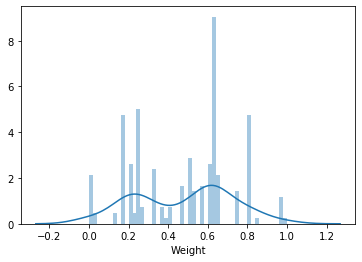

In [59]:
sns.distplot(AbsentsX["Weight"],bins=50)

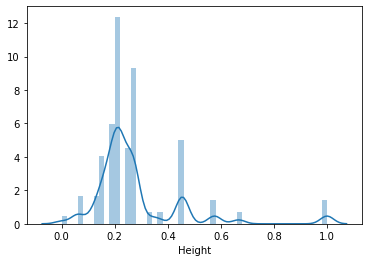

In [60]:
sns.distplot(AbsentsX["Height"],bins=50)

In [ ]:
sns.distplot(AbsentsX["Body mass index"],bins=50)